In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, models, datasets
from torch.utils.data import SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from data_preprocess import data_preprocess
from train import train

In [2]:
train_datadir = "C:/Users/56316/Desktop/kagglecatsanddogs_3367a/PetImages"
batch_size = 30
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the dataset from the file and virtualize some data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


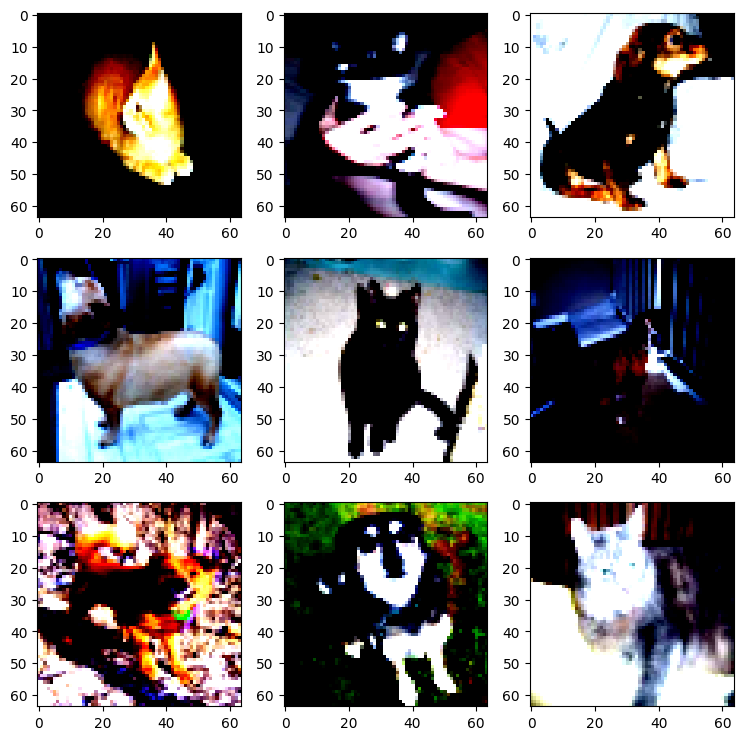

In [3]:
train_dataloader,eval_dataloader = data_preprocess(train_datadir, batch_size)
figure = plt.figure(figsize=(9, 9))
for img,_ in train_dataloader:
    for i in range(9):
        figure.add_subplot(3, 3, i+1)     
        a = img[i].swapaxes(0, 1)
        a = a.swapaxes(1, 2)
        plt.imshow(a, cmap='gray', vmin=0, vmax=255)   
    break     
plt.show()      

## Creating a basic CNN network

In [4]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):

        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(64,128, kernel_size = 3,padding = 1), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(4,4))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(4*4*256,512), 
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
    
model = CNNModel(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 1e-4)
model = model.to(device)

# VGG16 model

In [5]:
vgg_modle = models.vgg16(weights="VGG16_Weights.IMAGENET1K_V1")
for param in vgg_modle.parameters():
    param.requires_grad = False
vgg_modle.classifier[5] = nn.Dropout(0.2)
vgg_modle.classifier[6] = nn.Linear(4096, 2)


criterion = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(vgg_modle.parameters(), lr= 1e-4)

vgg_modle = vgg_modle.to(device)

# Training the CNN model

In [6]:
epochs = 15
history = train(model, optimizer,criterion, train_dataloader, eval_dataloader, epochs, device)

  0%|          | 0/15 [00:00<?, ?it/s]

c:\Users\56316\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1/15, train loss: 0.4872054177993832, train acc: 0.6550480769230769, val loss: 0.10492884990969235, val acc: 0.7473452213985173
Epoch 2/15, train loss: 0.39380680937893886, train acc: 0.7590144230769231, val loss: 0.088907301733402, val acc: 0.8040472851132038
Epoch 3/15, train loss: 0.3326589030279812, train acc: 0.8104467147435898, val loss: 0.08176160725047417, val acc: 0.8158685634141455
Epoch 4/15, train loss: 0.2840736953559473, train acc: 0.8436999198717948, val loss: 0.06930016084781293, val acc: 0.8465237427369264
Epoch 5/15, train loss: 0.24504737733297277, train acc: 0.868339342948718, val loss: 0.06242738440623865, val acc: 0.8633540372670807
Epoch 6/15, train loss: 0.2081481321856276, train acc: 0.8900741185897436, val loss: 0.06743108043937071, val acc: 0.8573432177920256
Epoch 7/15, train loss: 0.17686418672250656, train acc: 0.9090544871794872, val loss: 0.0642095604825848, val acc: 0.8593468242837107
Epoch 8/15, train loss: 0.14653145192350933, train acc: 0.92713

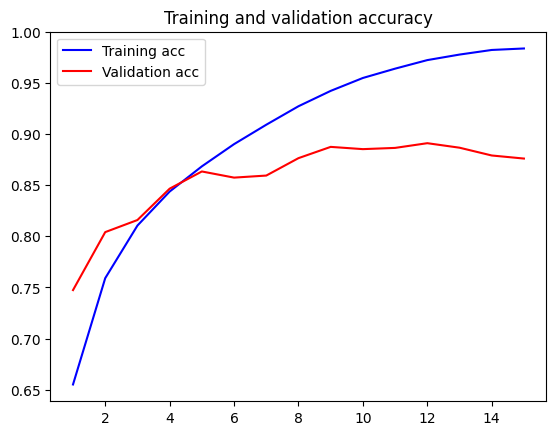

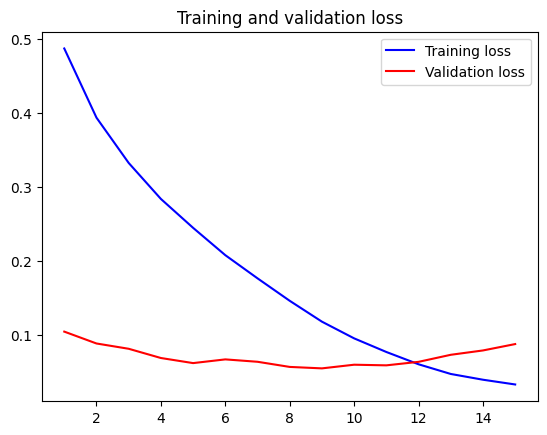

In [7]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Training the VGG16 model

In [8]:
epochs = 15
history1 = train(vgg_modle, optimizer1, criterion, train_dataloader,eval_dataloader, epochs, device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1/15, train loss: 0.253961299733417, train acc: 0.8583733974358975, val loss: 0.04914231944413248, val acc: 0.8946102985373673
Epoch 2/15, train loss: 0.2148197869784371, train acc: 0.8843149038461539, val loss: 0.04746279709590084, val acc: 0.8966139050290522
Epoch 3/15, train loss: 0.202544219448898, train acc: 0.8896233974358975, val loss: 0.047810396126346945, val acc: 0.8964135443798837
Epoch 4/15, train loss: 0.19658704394014692, train acc: 0.8921274038461539, val loss: 0.04702404547672135, val acc: 0.8992185934682428
Epoch 5/15, train loss: 0.19316996332478736, train acc: 0.8950320512820513, val loss: 0.046316974491909045, val acc: 0.9020236425566018
Epoch 6/15, train loss: 0.18902892450562434, train acc: 0.8960837339743589, val loss: 0.04652522814991936, val acc: 0.8960128230815468
Epoch 7/15, train loss: 0.18622531762760886, train acc: 0.8987880608974359, val loss: 0.04623160786931821, val acc: 0.8996193147665799
Epoch 8/15, train loss: 0.1841689544161632, train acc: 0.8

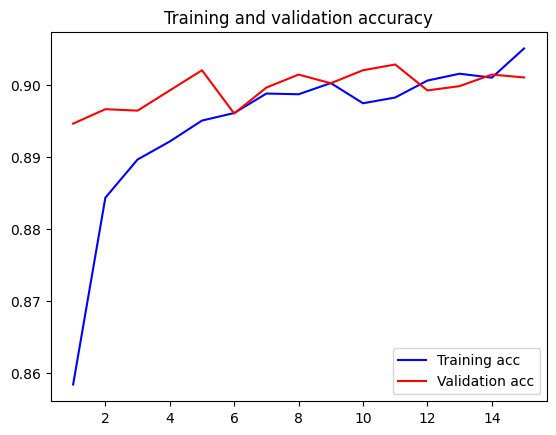

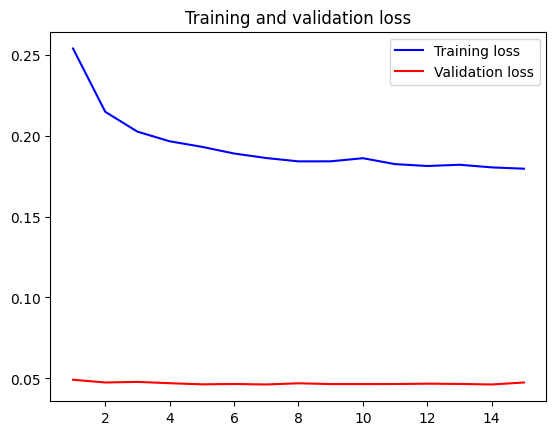

In [9]:
acc = history1['acc']
val_acc = history1['val_acc']
loss = history1['loss']
val_loss = history1['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()